In [1]:
import pandas as pd
from langdetect import detect, DetectorFactory
import matplotlib.pyplot as plt

In [2]:
DetectorFactory.seed = 42

In [3]:
# CSV dosyasını oku
df = pd.read_csv("Age_of_Empires_IV_Anniversary_Edition_yorumlar.csv", comment="#")

In [4]:
# Güvenli dil tespiti
def detect_language_safe(text):
    try:
        return detect(str(text))
    except:
        return "unknown"

df["language"] = df["review_text"].apply(detect_language_safe)

In [23]:
# Dil → Kıta eşleştirmesi (örnek ve sadeleştirilmiş)
lang_to_continent = {
    "en": "North America / Europe",
    "fr": "Europe / Africa",
    "de": "Europe",
    "es": "South America / Europe",
    "ru": "Europe / Asia",
    "tr": "Asia",
    "zh-cn": "Asia",
    "pt": "South America",
    "ja": "Asia",
    "ko": "Asia",
    "pl": "Europe",
    "it": "Europe",
    "nl": "Europe",
    "unknown": "Çözülemeyen"
}

df["continent"] = df["language"].map(lang_to_continent).fillna("Other")

In [24]:
# Kıta bazlı yüzdelik dağılım
continent_dist = df["continent"].value_counts(normalize=True) * 100

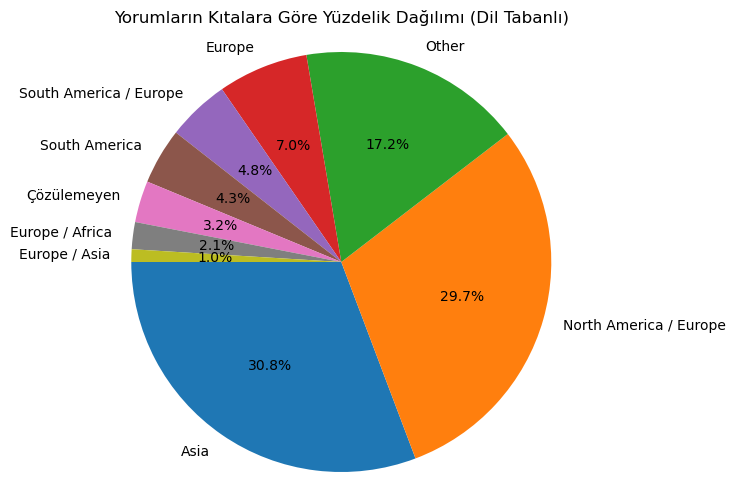

In [25]:
# Pasta grafiği
plt.figure(figsize=(8, 6))
plt.pie(continent_dist, labels=continent_dist.index, autopct="%1.1f%%", startangle=180)
plt.title("Yorumların Kıtalara Göre Yüzdelik Dağılımı (Dil Tabanlı)")
plt.axis("equal")
plt.show()